In [2]:
# --------- [셀 0] PATH에 bioinfo/bin 강제 추가 ----------
import os, sys, subprocess, textwrap
env_bin = os.path.dirname(sys.executable)          # .../envs/bioinfo/bin
if env_bin not in os.environ["PATH"].split(":"):
    os.environ["PATH"] = env_bin + ":" + os.environ["PATH"]
    print("✅ Added", env_bin, "to PATH")

# 확인
!which samtools
!samtools --version | head -1
# ---------------------------------------------------------

✅ Added /home/hyeonji/miniconda/envs/bioinfo/bin to PATH
/home/hyeonji/miniconda/envs/bioinfo/bin/samtools
samtools 1.21


In [10]:
%env PATH=/home/hyeonji/miniconda/envs/bioinfo/bin:/usr/bin:/bin

env: PATH=/home/hyeonji/miniconda/envs/bioinfo/bin:/usr/bin:/bin


In [6]:
SAMTOOLS = "/home/hyeonji/miniconda/envs/bioinfo/bin/samtools"

# 생물정보학 및 실습 1 - Term Project용 Mission 3 환경 셋업

```
생물정보학 및 실습 1
서울대학교 생물정보학전공/생명과학부 2025년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```

이 노트북은 Google Colab을 이용해서 Term Project를 할 수 있도록 환경을 준비해 줍니다. 터미널 사용이 원활하지 않은 상태이고, 데이터를 오랫동안 보관하기 어렵기 때문에 되도록 개인용 컴퓨터에서 [Anaconda](https://www.anaconda.com/)나 [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) 등을 설치하고 사용하시는 것이 편하지만, 개인용 컴퓨터 사양이 부족한 경우에는 Google CoLab을 사용할 수도 있습니다. 개인용 컴퓨터를 쓸 때는 Windows에서는 [WSL2](https://docs.microsoft.com/en-us/windows/wsl/install-win10)를 쓰시면 리눅스 커맨드라인 환경을 쓸 수 있습니다. Google Colab은 창을 닫은 후 90분 후, 또는 창을 처음 열고 12시간 후에 환경을 닫아버리기 때문에 매번 실습할 때마다 새로 셋업이 필요합니다. `Runtime->Run All`을 실행해서 전체를 한 번 실행하시면 준비됩니다. 모든 것이 잘 안 되고 뭔가 꼬인 느낌이 강하게 들 때는 `Runtime->Factory reset runtime`을 누르고 새로 시작하시면 될 수도 있습니다.


## Google Drive 마운트

데이터 파일들을 불러오고 저장하기 위해서 Google Drive를 연결합니다. **이번엔 스크립트 파일을 편집해야 하기 때문에 Google Drive 마운트를 하지 않으면 vim등 콘솔에서 쓸 수 있는 에디터를 쓰셔야 합니다.** 화면에 나오는 주소를 눌러서 인증하고 인증 코드를 그 아래에 입력하세요. 그러면 `/contents/drive/MyDrive`에서 자신의 Drive 최상단 폴더가 보입니다. Google CoLab에서 접속하지 않고, 본인 컴퓨터 또는 연구실 워크스테이션 등 다른 컴퓨터를 쓰시는 경우에는 저장공간이 충분하므로 이 부분은 생략하고 지나갑니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 실습용 Bioconda 환경 설치하기
Google CoLab에서 접속하지 않고, 본인 컴퓨터 또는 연구실 워크스테이션 등 다른 컴퓨터를 쓰시는 경우에는 따로 실습용 [Bioconda](https://bioconda.github.io/) 환경을 구축해서 이 노트북을 그 환경 안에서 띄우시면 됩니다.

CoLab을 쓰시는 분들은 다음에 따라서 실습용 프로그램들을 쉽게 설치할 수 있도록 [Bioconda](https://bioconda.github.io/) 환경을 만듭니다. 실행하고 진행상황을 관찰하다가 에러로 보이는 것이 있으면 잘 읽어보고 해결합니다.

파이썬 모듈들은 Colab쪽의 파이썬 인터프리터를 바꿀 수 없기 때문에 Conda에 설치하더라도 사용하기 어렵습니다. 파이썬 모듈은 `pip` 명령어로 설치하시면 Colab에서 불러와서 사용할 수 있습니다.

환경 초기화에 관련된 스크립트는 [GitHub 프로젝트](https://github.com/hyeshik/colab-biolab)에 있습니다.

In [ ]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

설정이 끝났으면, 이제 콘솔을 열어서 터미널로 접속할 수 있는 통로를 열어줍니다.

## 시퀀싱 데이터 다운로드
***첫 실습 시간에 데이터 복사를 마쳤으면 이 부분은 생략하고 지나갑니다.***

이제 실습 수업에서 필요한 시퀀싱 데이터를 다운로드 받아서 설치합시다. 드라이브 공간만 충분하면 데이터는 계속 저장돼 있기 때문에 학기 전체를 통해서 딱 한 번만 하시면 됩니다. Colab에서는 작업용 데이터를 Google Drive 폴더 아래의 `binfo-datapack1`에 저장합니다. 실습용 데이터는 `/content/drive/MyDrive/binfo1-datapack1`에 풀리게 됩니다.

### (Option 1) Google CoLab에서 접속한 경우
1. [Google Drive 공유폴더](https://drive.google.com/drive/folders/1QBJednh-C7A17PFOlpZHBKyDmBvd6klh?usp=sharing)에 접속합니다.
1. 중간 제목줄의 "binfo1-datapack1 ▾"에서 ▾을 누릅니다.
1. Add shortcut to Drive를 누릅니다.
1. My Drive를 선택해서 ADD SHORTCUT 버튼을 누릅니다.
1. 다음 cell을 실행해서 링크가 제대로 들어왔는지 확인합니다. (바로 확인되지 않으면 3–5분 정도 기다렸다가 하면 됩니다.)
1. 제대로 확인되면 다음으로 넘어갑니다.


In [ ]:
!ls -al /content/drive/MyDrive/binfo1-datapack1/

### (Option 2) CoLab외의 다른 환경에서 접속한 경우
본인 컴퓨터나 연구실 워크스테이션 등에서 작업하는 경우에는 다음 명령어로 다운로드 받으시면 됩니다. 첫 번째에는 wget이 접속오류를 내는 경우가 많으니, 접속에러가 발생하면 다시 한 번 실행해 보세요. `/content/drive/Mydrive` 부분은 원하는 저장 경로로 바꿔서 지정하시면 됩니다.

In [ ]:
!wget -O - --no-check-certificate https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar | tar -C /content/drive/MyDrive -xf -

### 파일 체크섬 확인
***첫 실습 시간에 데이터 복사를 마쳤으면 이 부분은 생략하고 지나갑니다.***

받은 데이터의 MD5 체크섬을 확인합니다. 한참 걸립니다. 각 파일들의 원래 체크섬은 다음과 같습니다. 한 번 비교해 보세요.

```
140aaf30bcb9276cc716f8699f04ddd6  CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  RPF-siLuc.bam.bai
```

In [ ]:
!md5sum drive/MyDrive/binfo1-datapack1/*

In [ ]:
!ls -al drive/MyDrive/binfo*

# 파일 복사하기
***첫 실습 시간에 데이터 복사를 마쳤으면 이 부분은 생략하고 지나갑니다.***

공유한 폴더를 나의 작업 폴더로 복사합니다.

In [ ]:
!mkdir -p /content/drive/MyDrive/binfo1-work
%cd /content/drive/MyDrive/binfo1-work
!cp ../binfo1-datapack1/* .

# 프로그램 설치
**첫 실습 시간에 데이터 복사를 마쳤으면 여기부터 시작합니다.**

데이터 준비가 끝났으면, 이제 이번 시간 실습에 필요한 프로그램들 몇 가지를 추가로 설치합니다.

In [ ]:
!conda install -y bedtools bioawk samtools

## Mission 3

이번 미션에서는 Figure S2A 아랫쪽에 표시되는 clustered error 분석 (CIMS; Crosslinking-induced mutation sites)을 합니다. 자외선에 의해서 단백질이 붙어있다가 단백질 분해효소로 단백질을 뜯어내고 남은 자리에서는 reverse-transcriptase가 오류를 자주 냅니다. 오류율을 분석해서 단백질이 앉아 있었던 자리를 분석해 봅시다.

데이터는 지난 번과 동일하기 때문에 이미 다운로드 받으셨다면 다시 다운로드 받을 필요는 없습니다.

In [ ]:
%cd /content/drive/MyDrive/binfo1-work/

Genome 전체로 계산하는 방법은 자원도 꽤 쓰고 시간이 걸리기 때문에 여기서는 유전자 단위로 간략하게 하도록 합시다. 예시로 Mirlet7g를 해 보고, 추가로 Mirlet7f-1과 Mirlet7d도 봐서 비교해 봅시다.

논문은 예전 레퍼런스 유전체인 mm9을 쓰고 있기 때문에, 현재 사용되는 레퍼런스 mm39와는 좌표계에 차이가 있습니다. 새로 annotation에서 위치를 찾습니다.

In [3]:
!grep -w 'Mirlet7g' ~/myproject/term_project_clean/binfo1-datapack1/gencode.gtf

chr9	ENSEMBL	gene	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; gene_type "miRNA"; gene_name "Mirlet7g"; level 3; mgi_id "MGI:2676800";
chr9	ENSEMBL	transcript	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";
chr9	ENSEMBL	exon	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; exon_number 1; exon_id "ENSMUSE00000522665.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";


In [27]:
!grep -w 'Mirlet7f-1' ~/myproject/term_project_clean/binfo1-datapack1/gencode.gtf

chr13	ENSEMBL	gene	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; level 3; mgi_id "MGI:2676798";
chr13	ENSEMBL	transcript	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; transcript_id "ENSMUST00000198652.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; transcript_type "miRNA"; transcript_name "Mirlet7f-1-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676798"; tag "basic";
chr13	ENSEMBL	exon	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; transcript_id "ENSMUST00000198652.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; transcript_type "miRNA"; transcript_name "Mirlet7f-1-201"; exon_number 1; exon_id "ENSMUSE00001348852.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676798"; tag "basic";


In [39]:
!grep -w 'Mirlet7d' ~/myproject/term_project_clean/binfo1-datapack1/gencode.gtf

chr13	ENSEMBL	gene	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; gene_type "miRNA"; gene_name "Mirlet7d"; level 3; mgi_id "MGI:2676796";
chr13	ENSEMBL	transcript	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; transcript_id "ENSMUST00000083519.3"; gene_type "miRNA"; gene_name "Mirlet7d"; transcript_type "miRNA"; transcript_name "Mirlet7d-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676796"; tag "basic";
chr13	ENSEMBL	exon	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; transcript_id "ENSMUST00000083519.3"; gene_type "miRNA"; gene_name "Mirlet7d"; transcript_type "miRNA"; transcript_name "Mirlet7d-201"; exon_number 1; exon_id "ENSMUSE00000522678.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676796"; tag "basic";


위 결과에서 gtf 파일이 없다고 나오면 압축이 풀리지 않은 상태일 수 있으니, 미리 풀어서 작업해보세요.

Splicing 되지 않는 transcript이기 때문에 결과가 단조롭습니다. 해당 좌표 범위로 bam을 솎아냅니다.

In [7]:
!$SAMTOOLS view -c binfo1-datapack1/CLIP-35L33G.bam chr9:106056039-106056126

163


In [28]:
!$SAMTOOLS view -c binfo1-datapack1/CLIP-35L33G.bam chr13:48691305-48691393

158


In [40]:
!$SAMTOOLS view -c binfo1-datapack1/CLIP-35L33G.bam chr13:48689488-48689590

187


In [11]:
!$SAMTOOLS view -b -o CLIP-let7g.bam \
        binfo1-datapack1/CLIP-35L33G.bam \
        chr9:106056039-106056126

!$SAMTOOLS view CLIP-let7g.bam | /usr/bin/wc -l

163


In [29]:
!$SAMTOOLS view -b -o CLIP-let7f-1.bam \
        binfo1-datapack1/CLIP-35L33G.bam \
        chr13:48691305-48691393

!$SAMTOOLS view CLIP-let7f-1.bam | /usr/bin/wc -l

158


In [41]:
!$SAMTOOLS view -b -o CLIP-let7d.bam \
        binfo1-datapack1/CLIP-35L33G.bam \
        chr13:48689488-48689590

!$SAMTOOLS view CLIP-let7d.bam | /usr/bin/wc -l

187


각 자리에 mapping된 read들의 분포를 요약하기 위해 samtools mpileup을 이용합니다. Shannon entropy를 구할 때는 reference를 따로 줄 필요는 없습니다. samtools를 쓰지 않고 직접 read를 분석하면 더욱 더 재미있습니다.

In [13]:
!$SAMTOOLS mpileup CLIP-let7g.bam > CLIP-let7g.pileup
!wc -l CLIP-let7g.pileup

[mpileup] 1 samples in 1 input files
68548 CLIP-let7g.pileup


In [30]:
!$SAMTOOLS mpileup CLIP-let7f-1.bam > CLIP-let7f-1.pileup
!wc -l CLIP-let7f-1.pileup

[mpileup] 1 samples in 1 input files
97 CLIP-let7f-1.pileup


In [42]:
!$SAMTOOLS mpileup CLIP-let7d.bam > CLIP-let7d.pileup
!wc -l CLIP-let7d.pileup

[mpileup] 1 samples in 1 input files
87 CLIP-let7d.pileup


Mirlet7g는 100bp도 안 되는 짧은 gene인데 `mpileup` 결과는 엄청 길게 나옵니다. 왜 그럴까요? (잘 한 번 생각해 봅시다)

이제 Mirlet7g의 핵심부분을 살펴봐서 어떻게 하면 좋을지 견적을 내 봅니다.

In [14]:
!head CLIP-let7g.pileup

chr9	106007092	N	9	^Ga^Ia^Ha^Ia^Ga^Ga^Ha^Ia^Ia	<IFIGGHII
chr9	106007093	N	9	ggggggggg	AFGIEGDII
chr9	106007094	N	9	ccccccccc	EHHIGAFEH
chr9	106007095	N	9	aaaaaaaaa	?HDIFA>II
chr9	106007096	N	9	aaaaaaaaa	EHHIG@CHH
chr9	106007097	N	9	ttttttttt	=HGEGDFII
chr9	106007098	N	9	aaaaaaaaa	?HHIGDEII
chr9	106007099	N	9	g-2nng-2nng-2nng-2nng-2nng-2nng-2nng-2nng-2nn	?IEHGEDII
chr9	106007100	N	9	*********	8IBIBC@EI
chr9	106007101	N	9	*********	8IBIBC@EI


In [31]:
!head CLIP-let7f-1.pileup

chr13	48691290	N	1	^Gg	A
chr13	48691291	N	26	c^Hc^Ic^Dc^Hc^Gc^Ic^Gc^Ic^Gc^Ic^Ic^Hc^Hc^Hc^Ec^Ic^Ic^Ic^Hc^Hc^Hc^Ic^Ic^Ic^Hc	DDI4G>I@H;GGGFH7IHIHHHFIIG
chr13	48691292	N	25	aaaaaaaaaaaaaaaaaaaaaaaaa	DGIG>IBI?IIGHH7HIEHFFGHIG
chr13	48691293	N	38	gggggggggggggggggggggggggg^Ig^Hg^Ig^Ig^Ig^Ig^Hg^Ig^Ig^Dg^Ig^Ig	DGI4>AIGIBIIGGE/IIIDGHIIIHEGIHIIBIIBII
chr13	48691294	N	49	cccccccccccccccccccccccccccccccccccccc^Ec^Hc^Ic^Hc^Hc^Gc^Ic^Ic^Gc^Ic^Hc	?>I1E5IDG<I>EHH7IIIFHHEIHGCEDIHIEHG?II3BIDD7IHGGH
chr13	48691295	N	58	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa^Ha^Ia^Ha^Ha^Ha^Ia^Ia^Ia^Ha	BDI?HBIGHGIHGHG7IIIGBGIIIGBEFIIIBIH=II=EIGA6IHGIHDIHGGIII0
chr13	48691296	N	81	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa^Ia^Ia^Da^Ia^Ha^Ia^Ha^Ga^Ha^Ha^Ga^Ia^Ha^Ha^Ia^Ha^Ha^Ia^Ha^Ia^Ga^Ia^Ga	<GI7H?IGIEIIGHG;FIIGGHIIIGIBGDIHGII@II9FHDA9IIGGHGIEGGIIIBEIBIHIG;DG?IBHICGIHI6I;
chr13	48691297	N	80	gggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggg	8EI.HBIGIGIGGHG1IIIGGGIIIEIB

In [43]:
!head CLIP-let7d.pileup

chr13	48689488	N	24	^Ga^Ia^Ha^Ia^Ha^Ia^Ia^Ia^Ga^Ia^Ia^Ia^Ia^Ia^Ha^Ia^Ga^Ga^Ga^Ia^Ea^Da^Ha^Ga	BIHGGIHIEIIIGIHIGEGH5BDD
chr13	48689489	N	53	aaaaaaaaaaaaaaaaaaaaaaaaa^Ia^Ha^Ia^Ga^Ga^Ha^Ia^Ia^Ga^Ga^Ia^Ia^Ha^Ia^Ia^Ha^Ha^Da^Ia^Ha^Ia^Ia^Ia^Ia^Ia^Ha^Ga^Ga	GIHIGIIIEIIIIIHIG>EB4@5HDIHIBEGIID?IIGII@H>IGHIIIGHDC
chr13	48689490	N	69	ttttttttttttttttttttttttttttttttttttttttttttttttttttt^Gt^Gt^Ht^Gt^It^It^Ht^It^Gt^Gt^Ht^It^It^It^Ht^It	GIHIGHIFFIIIIIFHGEDG;2>FDIHIDGBIIDBIIDIIAH>IBGIIIGHBG=BG=IIGIDGHFIIHI
chr13	48689491	N	105	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa^Ia^Ia^Ha^Ga^Ia^Ga^Ia^Ga^Ha^Ha^Ha^Ga^Ia^Ha^Ha^Ia^@a^Ia^Ia^Ia^Ga^Ha^Ha^Ga^Ha^Ga^Ia^Ha^Ga^Ia^Ga^Ha^Ga^Ia^Ia^Ga	EIGHEHHIEIIIIIHIGCBH:?>HGGHI>GBIIGBIIGIHBB;IHIIIIGHDC3=G:IGGIDEHIFIGHII=GIDHEGHHEIGGI7III9=HGBAIGBIGFG>I2
chr13	48689492	N	105	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa	GIGIEIEI7IIIGIGIG;?F:D@G7GHIAGAIIG3IIGIHDB2IHIIIIDDGC1<GCIIHIGCHIIIEIIIGCI

In [15]:
!awk '$2 >= 106056039 && $2 <= 106056126 { print $0; }' CLIP-let7g.pileup > CLIP-let7g-gene.pileup
!tail CLIP-let7g-gene.pileup

chr9	106056117	N	138	<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC	BHEIG?DIIHGHII:;HGIIDGGGIIBGEB?>H<GGIIIIDIIGFHIHH9IGG=GGHIDH?DGIBIIHHGGIEIGI8GIDHDG.GGHEDIIDIDGDHIDGIFGHG;DCDDHEE@I?CGG:IHGIBGIHIIDG@DHIGG
chr9	106056118	N	139	<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC	BHEIG?DIIHGHII3AHIIIDGGGIIB3EHFBH>GIIIIIIIIIHIIHHAIIGBDGHIDH?GIIGIIHHDIIHIGIGGI=BGG9GIHHHIIGI=IAIIGGIEHGIEBG@DHDE;IBDGG4IGGIGGIIIIGGGDGIH1G
chr9	106056119	N	138	<<<<<<<<<TTTTTTTTTTTTTTTTTTTTTTTTTT$TTTT$TTTTTTTTTTTTTTT$TTTT$TTTTTTT$TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT	BHEIG?DIIGEFII:/GIIEDDHDIIF>BH3<HBEGIHIGFIIIBIIBE:HHGD>EGGDH7BIIGGIHHDHIHDEIGEIDHGG;GIHGHHIGD:IGHD:GGEHH?3G87HD</I=DGG=IHHIHBIFII@<HDHHH1G
chr9	106056120	N	133	<<<<<<<<<TTTTTTTTTTTTTTTTTTTTTTTTTTTT$TTTT$TTT$TTTTTTTTTT$TTTTTTTT$TTTTTTTT

In [32]:
!awk '$2 >= 48691305 && $2 <= 48691393 { print $0; }' CLIP-let7f-1.pileup > CLIP-let7f-1-gene.pileup
!tail CLIP-let7f-1-gene.pileup

chr13	48691377	N	24	tttttttttttttttttttttttt	BIIGIGEDCGFIFGI@GHIDDIGI
chr13	48691378	N	24	aaaaaaaaaaaaaaaaaaaaaaaa	?HIFIGGGAFEFABI>GII;EIGI
chr13	48691379	N	24	cccccccccccccccccccccccc	EIIGIGGDEGGIEGI;GIIDDIGI
chr13	48691380	N	24	tttttttttttttttttttttttt	EIIGIBGGEGFIFGI@GIIBDIGI
chr13	48691381	N	24	aaaaaaaaaaaaaaaaaaaaaaaa	BEHFIGEG@FCEAGH4GII;AIDH
chr13	48691382	N	24	cccccccccccccccccccccccc	?IEGIHGG?GEGEBI=GIIDEIGG
chr13	48691383	N	24	cccccccccccccccccccccccc	EIGGIGGGAGFGFGI=GIIDGIGG
chr13	48691384	N	24	tttttttttttttttttttttttt	<IGGIHGG>GEGBGI8GII@GIGG
chr13	48691385	N	24	cccccccccccccccccccccccc	BIGGIBDD?GEGBEI=GIIBGIGG
chr13	48691386	N	24	a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$	EIGGIFDECGFGFGI2BIIDGIGG


In [44]:
!awk '$2 >= 48689488 && $2 <= 48689590 { print $0; }' CLIP-let7d.pileup > CLIP-let7d-gene.pileup
!tail CLIP-let7d-gene.pileup

chr13	48689565	N	6	cccccc	>IGIIH
chr13	48689566	N	6	tttttt	:IGFIH
chr13	48689567	N	6	aaaaaa	8IFIFI
chr13	48689568	N	6	cccccc	?IGIII
chr13	48689569	N	6	tttttt	;IGIII
chr13	48689570	N	5	aaaaa	EDECD
chr13	48689571	N	6	cccccc	:GGIGG
chr13	48689572	N	6	cccccc	:GGIGG
chr13	48689573	N	6	tttttt	5GGIGG
chr13	48689574	N	6	c$c$c$c$c$c$	;GGIGG


이제 pandas에 불러와서 분석해 봅니다. R을 쓰시는 분들은 R로 보내서 작업하셔도 됩니다.

In [17]:
conda install -y pandas

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/hyeonji/miniconda/envs/bioinfo

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    numpy-2.2.5                |  py311h5d046bc_0         8.6 MB  conda-forge
    pandas-2.2.3               |  py311h7db5c69_3        15.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        23.6 MB

The following NEW packages will be INSTALLED:

  libblas            conda-forge/linux-64::libblas-3.9.0-31_h59b9bed_openblas 
  libcblas           conda-forge/linux-64::libcblas-3.9.0-31_he106b2a_openblas 
  libgfortran        conda-forge/linux-64::libgfortran-15.1.0-h69a702a_2 
  libgfortran5       conda-forge/linux-64::libgfortran5-15.1.0-hcea5267_

In [18]:
import pandas as pd

pileup = pd.read_csv('CLIP-let7g-gene.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
pileup.tail()

,chrom,pos,_ref,count,basereads,quals
83,chr9,106056122,N,88,<<<<<<<<<C$C$C$C$C$C$C$C$C$C$C$C$C$CCCCCC$C$C$...,BHEIG?DIIEEGIIC;GIHEGBIIIIB1=FII?FEIGGGHDBIG=H...
84,chr9,106056123,N,31,<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCC,BHEIG?DIIIIII>GIGGIGGD>BIHHHIEH
85,chr9,106056124,N,31,<<<<<<<<<AAAAAAAAAAAAAAAAAAAAAA,BHEIG?DIIIIHIGGIGGGIG:9DDBIEGFH
86,chr9,106056125,N,31,<<<<<<<<<GGGGGGGGGGGGGGGGGGGGGG,BHEIG?DIIIIIIGGE@GFIGD;GIGIIFHD
87,chr9,106056126,N,30,<<<<<<<<<GGGGGGGGGGGGGGGGGGGGG,BHEIG?DIIIIGHGHIGHI>G;GGGIGIHG


In [33]:
import pandas as pd

pileup = pd.read_csv('CLIP-let7f-1-gene.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
pileup.tail()

,chrom,pos,_ref,count,basereads,quals
77,chr13,48691382,N,24,cccccccccccccccccccccccc,?IEGIHGG?GEGEBI=GIIDEIGG
78,chr13,48691383,N,24,cccccccccccccccccccccccc,EIGGIGGGAGFGFGI=GIIDGIGG
79,chr13,48691384,N,24,tttttttttttttttttttttttt,<IGGIHGG>GEGBGI8GII@GIGG
80,chr13,48691385,N,24,cccccccccccccccccccccccc,BIGGIBDD?GEGBEI=GIIBGIGG
81,chr13,48691386,N,24,a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$,EIGGIFDECGFGFGI2BIIDGIGG


In [45]:
import pandas as pd

pileup = pd.read_csv('CLIP-let7d-gene.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
pileup.tail()

,chrom,pos,_ref,count,basereads,quals
82,chr13,48689570,N,5,aaaaa,EDECD
83,chr13,48689571,N,6,cccccc,:GGIGG
84,chr13,48689572,N,6,cccccc,:GGIGG
85,chr13,48689573,N,6,tttttt,5GGIGG
86,chr13,48689574,N,6,c$c$c$c$c$c$,;GGIGG


여기서 pileup에서 계산에 사용할 것은 match와 substitution만입니다. 나머지에 해당하는 tag들은 제거합니다.

R을 쓰시는 분들은 R로 보내서 작업하셔도 됩니다.

In [19]:
import re
toremove = re.compile('[<>$*#^]')
pileup['matches'] = pileup['basereads'].apply(lambda x: toremove.sub('', x))

In [20]:
pileup[['chrom', 'pos', 'matches']]

,chrom,pos,matches
0,chr9,106056039,
1,chr9,106056040,
2,chr9,106056041,
3,chr9,106056042,
4,chr9,106056043,
...,...,...,...
83,chr9,106056122,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
84,chr9,106056123,CCCCCCCCCCCCCCCCCCCCCC
85,chr9,106056124,AAAAAAAAAAAAAAAAAAAAAA
86,chr9,106056125,GGGGGGGGGGGGGGGGGGGGGG


In [21]:
pileup[pileup['pos'] == 106056094].iloc[0]['matches']

'GGGGGGAAAAAAAAGGGGGAAAAAAGCCGCAGGATGAGGTGATAAGGGAGGGGTGAAGGGCGGTGAAGGGGAAAAGAGAAAGAAAAATAAAGGGGGAGTGGGAGGAAGAAGAGAATA'

처리하는 도중에 matches에서 뜻밖의 예외상황이 있을 수 있습니다.
예외상황 중 결과에 영향을 미치지 않는 패턴은 미리 제거하고 처리하면 편리합니다.

In [34]:
pileup['matches'] = pileup['basereads'].apply(lambda x: toremove.sub('', x))

In [35]:
pileup[['chrom', 'pos', 'matches']]

,chrom,pos,matches
0,chr13,48691305,cccccccccccccccccccccccccccccccccccccccccccccc...
1,chr13,48691306,tttttttttttttttttttttttttttttttttttttttttttttt...
2,chr13,48691307,cccccccccccccccccccccccccccccccccccccccccccccc...
3,chr13,48691308,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
4,chr13,48691309,gggggggggggggggggggggggggggggggggggggggggggggg...
...,...,...,...
77,chr13,48691382,cccccccccccccccccccccccc
78,chr13,48691383,cccccccccccccccccccccccc
79,chr13,48691384,tttttttttttttttttttttttt
80,chr13,48691385,cccccccccccccccccccccccc


In [46]:
pileup['matches'] = pileup['basereads'].apply(lambda x: toremove.sub('', x))

In [47]:
pileup[['chrom', 'pos', 'matches']]

,chrom,pos,matches
0,chr13,48689488,GaIaHaIaHaIaIaIaGaIaIaIaIaIaHaIaGaGaGaIaEaDaHaGa
1,chr13,48689489,aaaaaaaaaaaaaaaaaaaaaaaaaIaHaIaGaGaHaIaIaGaGaI...
2,chr13,48689490,tttttttttttttttttttttttttttttttttttttttttttttt...
3,chr13,48689491,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
4,chr13,48689492,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
...,...,...,...
82,chr13,48689570,aaaaa
83,chr13,48689571,cccccc
84,chr13,48689572,cccccc
85,chr13,48689573,tttttt


자 이제 데이터 준비가 대충 끝났습니다. 다음 순서로 진행해 보세요. (1-4번 단계는 R을 쓰시는 분들은 R로 보내서 작업하셔도 됩니다.)

1. 각 position별로 base수를 셉니다.
1. 각 position별로 Shannon entropy를 계산합니다.
1. 계산한 Shannon entropy를 [bedgraph format](https://genome.ucsc.edu/goldenPath/help/bedgraph.html)으로 출력합니다. 말은 복잡해도 실제로는 간단합니다. 4칸짜리를 만드시면 됩니다.
1. 결과 파일을 본인의 Google Drive에서 가져옵니다.
1. [UCSC Genome Browser](http://genome.ucsc.edu/cgi-bin/hgTracks?db=mm39&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=chr9%3A106056039-106056126)에 접속해서 Genome은 mm39로 선택합니다.
1. 그래프 아랫쪽의 add custom tracks 버튼을 누릅니다.
1. Paste URLs or data 옆의 Choose File 버튼을 누르고 우리가 만든 bedgraph 파일을 업로드 합니다.
1. 그리고 이리 저리 감상해 보다가 View 메뉴의 PDF/PS 를 눌러서 인증샷을 한 번 찍습니다.
1. Mirlet7d와 Mirlet7f-1도 한 번 해 봅니다.

In [48]:
import collections

def count_bases(row):
    ref = row['_ref'].upper()              # 참조 염기
    cnt = collections.Counter()

    for b in row['matches']:
        if b in '.,':                      # ref match
            cnt[ref] += 1
        else:
            b = b.upper()
            if b in 'ACGTN':
                cnt[b] += 1
    return pd.Series({f'{b}_cnt': cnt.get(b, 0) for b in 'ACGTN'})

base_counts = pileup.apply(count_bases, axis=1)

pileup_counts = pd.concat(
    [pileup[['chrom', 'pos']], base_counts],
    axis=1
)
print("Step 1 done — preview:")
display(pileup_counts.head())              # --- OK

Step 1 done — preview:


,chrom,pos,A_cnt,C_cnt,G_cnt,T_cnt,N_cnt
0,chr13,48689488,24,0,6,0,0
1,chr13,48689489,53,0,6,0,0
2,chr13,48689490,0,0,5,69,0
3,chr13,48689491,105,0,11,0,0
4,chr13,48689492,105,0,0,0,0


In [49]:
import math

def shannon(row):
    total = sum(row[f'{b}_cnt'] for b in 'ACGTN')
    if total == 0:
        return 0
    return -sum(
        (row[f'{b}_cnt']/total) * math.log2(row[f'{b}_cnt']/total)
        for b in 'ACGTN' if row[f'{b}_cnt'] > 0
    )

pileup_counts['entropy'] = pileup_counts.apply(shannon, axis=1)
print("Step 2 done — entropy added")       # --- OK


Step 2 done — entropy added


In [50]:
bedgraph = pileup_counts.copy()
bedgraph['start'] = bedgraph['pos'] - 1    # bed 0-based
bedgraph['end']   = bedgraph['pos']

bedgraph_out = bedgraph[['chrom', 'start', 'end', 'entropy']]
outfile = 'Mirlet7d_entropy.bedGraph'
bedgraph_out.to_csv(outfile, sep='\t', header=False, index=False)
print("Step 3 done — saved:", outfile)     # --- OK

Step 3 done — saved: Mirlet7d_entropy.bedGraph


In [1]:
print("kernel test")

kernel test


In [2]:
import pandas as pd

# pileup 파일 불러오기
pileup = pd.read_csv("CLIP-let7g-gene.pileup", sep="\t", header=None,
                     names=["chrom", "pos", "_ref", "count", "basereads", "quals"])

# ref와 매칭된 베이스들 중 mismatches만 남긴 새로운 열 생성
import re

# A. 'matches' 열 만들기: matches = basereads에서 특수기호 제거
toremove = re.compile(r'[<>$*#^]')
pileup["matches"] = pileup["basereads"].apply(lambda x: toremove.sub("", x))

# B. mismatch 있는 위치만 필터링
def is_mismatch(x):
    return any(b not in '.,' for b in x)

pileup_mismatches = pileup[pileup["matches"].apply(is_mismatch)]

# C. mismatch 있는 위치들 확인
print("Mismatch (CIMS) 후보 위치 수:", len(pileup_mismatches))
display(pileup_mismatches[["chrom", "pos", "_ref", "matches"]].head())

Mismatch (CIMS) 후보 위치 수: 82


,chrom,pos,_ref,matches
6,chr9,106056045,N,HTDTITGTHTHTITGTITHTHTITITHTHTGTHTGTHTHTHTITGT
7,chr9,106056046,N,GGGGGGGGGGGGGGGGGGGGGGG
8,chr9,106056047,N,AAAAAAAAAAAAAAAAAAAAAAA
9,chr9,106056048,N,GGGGGGGGGGGGGGGGGGGGGGG
10,chr9,106056049,N,GGGGGGGGGGGGGGGGGGGGGGG


In [3]:
# mismatch 위치를 중심으로 ±15nt 윈도우 생성
window_size = 15

pileup_mismatches['start'] = pileup_mismatches['pos'] - window_size
pileup_mismatches['end'] = pileup_mismatches['pos'] + window_size + 1  # end는 exclusive
pileup_mismatches['name'] = ['cims_' + str(i) for i in range(len(pileup_mismatches))]

# 필요한 형식만 추출
windows = pileup_mismatches[['chrom', 'start', 'end', 'name']].copy()

# bed 파일로 저장
windows.to_csv("let7g_mismatch_windows.bed", sep='\t', index=False, header=False)

print(f"{len(windows)}개 윈도우가 생성되어 let7g_mismatch_windows.bed 파일로 저장되었습니다.")
windows.head()

82개 윈도우가 생성되어 let7g_mismatch_windows.bed 파일로 저장되었습니다.


/tmp/ipykernel_52417/4187615159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_mismatches['start'] = pileup_mismatches['pos'] - window_size
/tmp/ipykernel_52417/4187615159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pileup_mismatches['end'] = pileup_mismatches['pos'] + window_size + 1  # end는 exclusive
/tmp/ipykernel_52417/4187615159.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,chrom,start,end,name
6,chr9,106056030,106056061,cims_0
7,chr9,106056031,106056062,cims_1
8,chr9,106056032,106056063,cims_2
9,chr9,106056033,106056064,cims_3
10,chr9,106056034,106056065,cims_4


In [5]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 18.6 MB/s eta 0:00:0031m32.8 MB/s eta 0:00:01


In [6]:
from Bio import SeqIO

for record in list(SeqIO.parse("let7g_mismatch_windows.fa", "fasta"))[:3]:
    print(f"{record.id}\n{record.seq}\n")

cims_0::chr9:106056030-106056061
GCCTGATTCCAGGCTGAGGTAGTAGTTTGTA

cims_1::chr9:106056031-106056062
CCTGATTCCAGGCTGAGGTAGTAGTTTGTAC

cims_2::chr9:106056032-106056063
CTGATTCCAGGCTGAGGTAGTAGTTTGTACA



In [7]:
import numpy as np
from Bio import SeqIO

# 윈도우 서열 로딩
records = list(SeqIO.parse("let7g_mismatch_windows.fa", "fasta"))
window_len = len(records[0].seq)

# 2D matrix 초기화
wc_matrix = np.zeros((window_len, window_len), dtype=int)

# WC-pair 조건 함수
def is_wc_pair(a, b):
    pair = {('A', 'U'), ('U', 'A'), ('G', 'C'), ('C', 'G')}
    return (a, b) in pair

# 윈도우 반복
for rec in records:
    seq = str(rec.seq).upper()
    for i in range(window_len):
        for j in range(i+1, window_len):
            if is_wc_pair(seq[i], seq[j]):
                wc_matrix[i, j] += 1

print("✅ 2D WC-pair matrix 생성 완료 — shape:", wc_matrix.shape)


✅ 2D WC-pair matrix 생성 완료 — shape: (31, 31)


In [8]:
import numpy as np

# 1. 전체 매트릭스 합
total_pairs = wc_matrix.sum()

# 2. 매트릭스를 상대적 빈도로 정규화 (0~1 사이)
wc_matrix_norm = wc_matrix / total_pairs

print("정규화된 WC-pair matrix 완료 — shape:", wc_matrix_norm.shape)


정규화된 WC-pair matrix 완료 — shape: (31, 31)


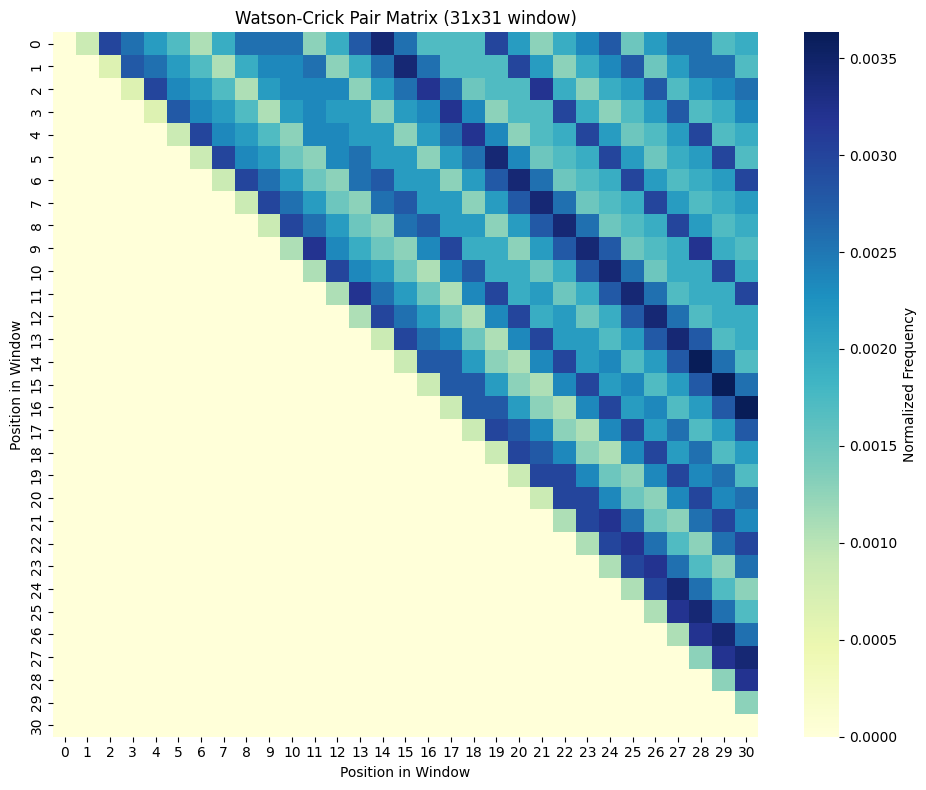

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(wc_matrix_norm, cmap="YlGnBu", square=True, cbar_kws={"label": "Normalized Frequency"})
plt.title("Watson-Crick Pair Matrix (31x31 window)")
plt.xlabel("Position in Window")
plt.ylabel("Position in Window")
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import re

def extract_mismatch_positions(pileup_path):
    """
    1) pileup 파일을 불러와서
    2) 'matches' 열 생성 (basereads에서 특수기호 제거)
    3) mismatch 포함된 행만 필터링
    4) 반환: pileup_mismatches DataFrame
    """
    cols = ["chrom", "pos", "_ref", "count", "basereads", "quals"]
    pileup = pd.read_csv(pileup_path, sep="\t", header=None, names=cols)

    toremove = re.compile(r'[<>$*#^]')
    pileup["matches"] = pileup["basereads"].apply(lambda x: toremove.sub("", x))

    # '.' 또는 ','가 아닌 문자가 하나라도 있으면 mismatch
    pileup["mismatch"] = pileup["matches"].apply(lambda x: any(b not in ".," for b in x))
    pileup_mismatches = pileup[pileup["mismatch"]].copy()

    print(f"{pileup_path} → mismatch 후보 위치 수: {len(pileup_mismatches)}")
    return pileup_mismatches

# let-7f-1과 let-7d 각각에 대해 mismatch 위치 추출
pileup_7f1_mismatches = extract_mismatch_positions("CLIP-let7f-1-gene.pileup")
pileup_7d_mismatches  = extract_mismatch_positions("CLIP-let7d-gene.pileup")


CLIP-let7f-1-gene.pileup → mismatch 후보 위치 수: 82
CLIP-let7d-gene.pileup → mismatch 후보 위치 수: 87


In [2]:
# 윈도우 절반 크기
window_half = 15

def create_bed_windows(mismatches_df, out_bed_path):
    """
    pileup_mismatches DataFrame에서 pos 기반 ±window_half 생성 → BED로 저장
    """
    df = mismatches_df.copy()
    df["start"] = df["pos"] - window_half
    df["end"]   = df["pos"] + window_half + 1  # bed는 end exclusive
    df = df[df["start"] >= 0]                  # 음수 시작 방지

    bed = df[["chrom", "start", "end"]].copy()
    bed["name"] = "CIMS"
    bed.to_csv(out_bed_path, sep="\t", header=False, index=False)
    print(f"Saved {len(bed)} windows to {out_bed_path}")

# let-7f-1 윈도우 생성
create_bed_windows(pileup_7f1_mismatches, "let7f-1_CIMS_windows.bed")

# let-7d 윈도우 생성
create_bed_windows(pileup_7d_mismatches,  "let7d_CIMS_windows.bed")


Saved 82 windows to let7f-1_CIMS_windows.bed
Saved 87 windows to let7d_CIMS_windows.bed


In [2]:
import numpy as np
from Bio import SeqIO

# ❶ 통합 FASTA 로딩
records = list(SeqIO.parse("all_CIMS_windows.fa", "fasta"))
window_len = len(records[0].seq)  # 31이어야 함

# ❷ 빈 31×31 정수 매트릭스 초기화
wc_matrix_all = np.zeros((window_len, window_len), dtype=int)

# WC 쌍 판별 함수 (RNA 기준 A–U, G–C)
def is_wc_pair(a, b):
    return (a, b) in {('A','U'), ('U','A'), ('G','C'), ('C','G')}

# ❸ 각 윈도우 순회하며 (i, j)마다 카운트
for rec in records:
    seq = str(rec.seq).upper().replace('T','U')  # T→U로 변환
    for i in range(window_len):
        for j in range(i+1, window_len):
            if is_wc_pair(seq[i], seq[j]):
                wc_matrix_all[i, j] += 1

print("통합 WC-pair 매트릭스 생성 완료 — shape:", wc_matrix_all.shape)


통합 WC-pair 매트릭스 생성 완료 — shape: (31, 31)


In [3]:
# 전체 윈도우 수
num_windows = len(records)

# ❶ 각 (i,j)쌍의 WC-pair 빈도를 fraction(0~1)으로
freq_matrix = wc_matrix_all / num_windows

# ❷ 전체 평균(expected frequency)
expected = freq_matrix.mean()

# ❸ 상대 빈도 (fold-change)
rel_matrix = freq_matrix / expected

# ❹ log2 변환 (neutral=0, 2x→+1, 0.5x→-1)
log2_matrix = np.log2(rel_matrix + 1e-9)  # 아주 작은 값 더해 0 나누기 방지

# 확인
print("Normalized & log2체(el) 매트릭스 생성 완료 — shape:", log2_matrix.shape)


Normalized & log2체(el) 매트릭스 생성 완료 — shape: (31, 31)


In [19]:
!pip install matplotlib seaborn numpy

In [4]:
# ─────────────────────────────────────────────────────────────────
# 1) 통합 FASTA 파일을 읽어 와서 records 리스트 생성
# ─────────────────────────────────────────────────────────────────

from Bio import SeqIO
import numpy as np

# all_CIMS_windows.fa 파일이 작업 디렉터리에 있어야 합니다.
records = list(SeqIO.parse("all_CIMS_windows.fa", "fasta"))

# 윈도우 길이(should be 31nt)
window_len = len(records[0].seq)
print(f"Loaded {len(records)} windows, each length = {window_len} nt")

# ─────────────────────────────────────────────────────────────────
# 2) wc_matrix_all (31×31 정수형) 계산하기
# ─────────────────────────────────────────────────────────────────

# 2-1. 빈 31×31 매트릭스 초기화
wc_matrix_all = np.zeros((window_len, window_len), dtype=int)

# 2-2. Watson-Crick pair 판별 함수 (RNA 기준: A–U, G–C)
def is_wc_pair(a, b):
    return (a, b) in {('A', 'U'), ('U', 'A'), ('G', 'C'), ('C', 'G')}

# 2-3. 각 윈도우 서열 순회하며 (i, j) 쌍에 대해 카운트
for rec in records:
    seq = str(rec.seq).upper().replace('T', 'U')  
    # (DNA로부터 추출된 FASTA는 T가 있기 때문에, RNA 기준 분석 시 U로 변환)
    for i in range(window_len):
        for j in range(i+1, window_len):
            if is_wc_pair(seq[i], seq[j]):
                wc_matrix_all[i, j] += 1

print("wc_matrix_all 생성 완료 — shape:", wc_matrix_all.shape)


Loaded 251 windows, each length = 31 nt
wc_matrix_all 생성 완료 — shape: (31, 31)


In [20]:
!pip install logomaker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 6.1 MB/s eta 0:00:00 MB/s eta 0:00:0102


In [34]:
from Bio import SeqIO

# 1) 인덱싱: mm39 게놈이 인덱싱되어 있어야 합니다.
genome_index = SeqIO.index("mm39.fa", "fasta")

# 2) let7g 구간 정보 (예: chr9:106056039–106056126)
chrom = "chr9"
start = 106056039
end   = 106056126

# 3) 해당 염색체 잘라오기 (1-based → 0-based, end-exclusive)
seq_chunk = genome_index[chrom].seq[start-1 : end]
seq_str   = str(seq_chunk).upper()  # DNA(T 포함) 형태

print(f"\n[{chrom}:{start}-{end}] DNA Sequence (length = {len(seq_str)}) :\n")
print(seq_str, "\n")


[chr9:106056039-106056126] DNA Sequence (length = 88) :

CCAGGCTGAGGTAGTAGTTTGTACAGTTTGAGGGTCTATGATACCACCCGGTACAGGAGATAACTGTACAGGCCACTGCCTTGCCAGG 



In [46]:
import gzip
import re
from collections import defaultdict
from Bio import SeqIO

# ────────────────────────────────────────────────────────────────────────
# (1) mm39용 GTF 파일 경로 (실제로 존재하는 파일명으로 수정하세요)
#    예시: 작업 폴더에 'gencode.gtf.gz' 파일이 있다면 아래처럼 적습니다.
# ────────────────────────────────────────────────────────────────────────
gtf_path = "binfo1-datapack1/gencode.gtf.gz"   # ← 실제 파일 이름과 경로를 정확히 써 주세요!

# Mirlet7 계열 전구체(pre‐miRNA) 좌표를 담을 dict
mirlet7_coords = defaultdict(list)

# GTF를 열 때는 gzip.open을 써서 압축을 풀어서 읽습니다.
with gzip.open(gtf_path, "rt") as fh:
    for line in fh:
        if line.startswith("#"):
            continue
        cols = line.strip().split("\t")
        chrom, feature_type = cols[0], cols[2]
        start, end = int(cols[3]), int(cols[4])
        attr_field = cols[8]
        
        # gene_name 필드에서 'Mirlet7'로 시작하는지 확인
        match_gn = re.search(r'gene_name "([^"]+)"', attr_field)
        if match_gn:
            gene_name = match_gn.group(1)
            if gene_name.startswith("Mirlet7"):
                # pre-miRNA 전구체는 feature_type == "transcript"로 가정
                if feature_type == "transcript":
                    strand = cols[6]
                    mirlet7_coords[gene_name].append((chrom, start, end, strand))

# 좌표 확인용 출력
print("=== Found Mirlet7 pre‐miRNA transcripts: ===")
for g, lst in mirlet7_coords.items():
    for (c, s, e, strd) in lst:
        print(f"  • {g}: {c}:{s}-{e} ({strd})")
print(f"\n총 {len(mirlet7_coords)}개의 Mirlet7 계열을 찾았습니다.\n")

# ────────────────────────────────────────────────────────────────────────
# (2) mm39 전체 유전체 FASTA 인덱싱
#    • 반드시 mm39.fa 파일이 압축 해제된 상태여야 합니다.
# ────────────────────────────────────────────────────────────────────────
genome_index = SeqIO.index("mm39.fa", "fasta")

# ────────────────────────────────────────────────────────────────────────
# (3) DNA motif: AAGNG 
# ────────────────────────────────────────────────────────────────────────
dna_motif_pattern = re.compile(r"AAG[ACGT][ACT]G")

# ────────────────────────────────────────────────────────────────────────
# (4) Mirlet7 pre‐miRNA 구간마다 motif 검색 + ±15nt 윈도우 추출
# ────────────────────────────────────────────────────────────────────────
all_windows = []
window_radius = 15
window_length = window_radius * 2 + 1  # 31

for gene, coord_list in mirlet7_coords.items():
    for (chrom, region_start, region_end, strand) in coord_list:
        if chrom not in genome_index:
            print(f"경고: {chrom} not found in mm39.fa → 건너뜁니다.")
            continue
        
        # 해당 구간 DNA 서열(1-based → 0-based) 추출
        sub_seq_dna = genome_index[chrom].seq[region_start - 1 : region_end]
        sub_str_dna = str(sub_seq_dna).upper()
        
        # DNA motif(AAGN[ACT]G) 검색
        for m in dna_motif_pattern.finditer(sub_str_dna):
            # m.start()는 “첫 번째 A”의 0-based 인덱스(슬라이스된 sub_str_dna 내부)
            # 절대 좌표(1-based) = (region_start - 1) + m.start() + 1
            motif_abs_start = (region_start - 1) + m.start() + 1
            # 첫 번째 G 의 절대 좌표(1-based)
            first_G_pos = motif_abs_start + 2
            
            # ±15nt 윈도우 (1-based 좌표)
            win0 = first_G_pos - window_radius
            win1 = first_G_pos + window_radius
            if win0 < 1 or win1 > len(genome_index[chrom].seq):
                continue
            
            # DNA → RNA(U) 치환하여 윈도우 시퀀스 생성
            raw_win_dna = genome_index[chrom].seq[win0 - 1 : win1]
            raw_win_rna = str(raw_win_dna).upper().replace("T", "U")
            if len(raw_win_rna) != window_length:
                continue
            
            # FASTA 헤더 (1-based inclusive)
            hdr = f"{gene}_{chrom}:{first_G_pos - window_radius}-{first_G_pos + window_radius}"
            all_windows.append((gene, hdr, raw_win_rna))
    
    print(f"[{gene}] 생성된 윈도우 개수 = {len([w for w in all_windows if w[0]==gene])}")

print(f"\n전체 Mirlet7 계열에서 {len(all_windows)}개의 윈도우가 생성되었습니다.\n")

# ────────────────────────────────────────────────────────────────────────
# (5) FASTA 파일로 저장
# ────────────────────────────────────────────────────────────────────────
out_fasta = "all_Mirlet7_motif_centered.fa"
with open(out_fasta, "w") as fw:
    for gene, hdr, seq in all_windows:
        fw.write(f">{hdr}\n")
        fw.write(seq + "\n")

print(f"→ '{out_fasta}'에 {len(all_windows)}개의 윈도우를 저장했습니다.")


=== Found Mirlet7 pre‐miRNA transcripts: ===
  • Mirlet7a-2: chr9:41448012-41448107 (+)
  • Mirlet7g: chr9:106056039-106056126 (+)
  • Mirlet7i: chr10:122821545-122821629 (-)
  • Mirlet7d: chr13:48689488-48689590 (-)
  • Mirlet7f-1: chr13:48691305-48691393 (-)
  • Mirlet7a-1: chr13:48691655-48691748 (-)
  • Mirlet7c-2: chr15:85590804-85590898 (+)
  • Mirlet7b: chr15:85591520-85591604 (+)
  • Mirlet7c-1: chr16:77396545-77396638 (+)
  • Mirlet7e: chr17:18050614-18050706 (+)
  • Mirlet7f-2: chrX:150695342-150695424 (+)

총 11개의 Mirlet7 계열을 찾았습니다.

[Mirlet7a-2] 생성된 윈도우 개수 = 0
[Mirlet7g] 생성된 윈도우 개수 = 0
[Mirlet7i] 생성된 윈도우 개수 = 0
[Mirlet7d] 생성된 윈도우 개수 = 0
[Mirlet7f-1] 생성된 윈도우 개수 = 0
[Mirlet7a-1] 생성된 윈도우 개수 = 0
[Mirlet7c-2] 생성된 윈도우 개수 = 0
[Mirlet7b] 생성된 윈도우 개수 = 0
[Mirlet7c-1] 생성된 윈도우 개수 = 0
[Mirlet7e] 생성된 윈도우 개수 = 0
[Mirlet7f-2] 생성된 윈도우 개수 = 0

전체 Mirlet7 계열에서 0개의 윈도우가 생성되었습니다.

→ 'all_Mirlet7_motif_centered.fa'에 0개의 윈도우를 저장했습니다.


In [53]:
import re

# 1) FASTA 파일 내용을 코딩해서 직접 변수에 넣습니다.
let7g_seq = "CCAGGCTGAGGTAGTAGTTTGTACAGTTTGAGGGTCTATGATACCACCCGGTACAGGAGATAACTGTACAGGCCACTGCCTTGCCAGG"  # 앞에서 뽑은 let7g_precursor.fa의 시퀀스

# 2) 정규식(AAGN[ACT]G) 지정
pattern = re.compile(r"GAGG")

# 3) finditer
matches = list(pattern.finditer(let7g_seq.upper()))
print("총 매칭 개수:", len(matches))
for m in matches:
    print("  매칭 위치(0-based):", m.start(), "매칭 문자열:", m.group())


총 매칭 개수: 2
  매칭 위치(0-based): 7 매칭 문자열: GAGG
  매칭 위치(0-based): 29 매칭 문자열: GAGG


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logomaker as lm
from Bio import SeqIO

# ─────────────────────────────────────────────────────────────
# STEP 0. 설정: FASTA 및 BedGraph 경로, 파라미터
# ─────────────────────────────────────────────────────────────
GENOME_FA       = "mm39.fa"                 # mm39 reference FASTA (반드시 인덱스 존재)
BEDGRAPH_G      = "Mirlet7g_entropy.bedGraph"   # 4-열 BedGraph
BEDGRAPH_F1     = "Mirlet7f-1_entropy.bedGraph" # 4-열 BedGraph
BEDGRAPH_D      = "Mirlet7d_entropy.bedGraph"   # 4-열 BedGraph

window_radius   = 15                        # ±15 nt window → length = 31
window_length   = 2*window_radius + 1       # 31
entropy_threshold = 0.02              # 이 값 이상인 엔트로피 위치 모두 선택

# ─────────────────────────────────────────────────────────────
# STEP 1. BedGraph 파일을 읽어서 “pos1b = start + 1” 로 변환
# ─────────────────────────────────────────────────────────────
def read_bedgraph_4col(path, chrom_name):
    """
    • BedGraph 4열: chrom, start, end, entropy
    • 'start'는 0-based coordinate, 'end' = 'start'+1 형태로 들어있다고 가정.
    • 실제 crosslink 염기의 1-based 위치는 pos1b = start + 1.
    • 반환: pandas DataFrame(columns=['chrom','pos','entropy'])
    """
    df = pd.read_csv(path, sep="\t", header=None,
                     names=["chrom","start","end","entropy"])
    # 1) 불러올 때 이미 'chrom' 칼럼이 "chr9", "chr13" 형태여야 함.
    #    만약 실제 BedGraph에 "9" 같은 숫자만 있었다면 접두사 'chr'를 붙이는 작업 필요.
    #    여기서는 “파일에 이미 'chr9' 형태로 들어 있다”라고 가정.
    #
    # 2) "pos1b" = df["start"] + 1  (crosslink site의 1-based 좌표)
    df["pos"] = df["start"].astype(int) + 1

    # 3) 최종적으로 columns = ['chrom','pos','entropy'] 만 남긴다
    df2 = df[["chrom","pos","entropy"]].copy()
    return df2

# 세 파일 모두 읽어서 DataFrame 생성
df_g  = read_bedgraph_4col(BEDGRAPH_G,  "chr9")
df_f1 = read_bedgraph_4col(BEDGRAPH_F1, "chr13")
df_d  = read_bedgraph_4col(BEDGRAPH_D,  "chr13")

# 확인: 올바르게 변환되었는지 head/unique 확인
print("Mirlet7g head:\n", df_g.head())
print("Mirlet7g chrom unique:", df_g["chrom"].unique())

print("Mirlet7f-1 head:\n", df_f1.head())
print("Mirlet7f-1 chrom unique:", df_f1["chrom"].unique())

print("Mirlet7d head:\n", df_d.head())
print("Mirlet7d chrom unique:", df_d["chrom"].unique())

Mirlet7g head:
   chrom        pos  entropy
0  chr9  106056039      0.0
1  chr9  106056040      0.0
2  chr9  106056041      0.0
3  chr9  106056042      0.0
4  chr9  106056043      0.0
Mirlet7g chrom unique: ['chr9']
Mirlet7f-1 head:
    chrom       pos  entropy
0  chr13  48691305     -0.0
1  chr13  48691306     -0.0
2  chr13  48691307     -0.0
3  chr13  48691308     -0.0
4  chr13  48691309     -0.0
Mirlet7f-1 chrom unique: ['chr13']
Mirlet7d head:
    chrom       pos   entropy
0  chr13  48689488  0.721928
1  chr13  48689489  0.474345
2  chr13  48689490  0.356780
3  chr13  48689491  0.452382
4  chr13  48689492 -0.000000
Mirlet7d chrom unique: ['chr13']


In [66]:
# STEP 2. entropy ≥ threshold인 모든 위치를 후보(candidates)로 모으기
# ─────────────────────────────────────────────────────────────
candidates = []  # (gene, chrom, pos1b) 튜플

for gene, df in zip(["Mirlet7g","Mirlet7f-1","Mirlet7d"], [df_g, df_f1, df_d]):
    df_h = df[df["entropy"] >= entropy_threshold].copy()
    print(f"{gene}에서 entropy ≥ {entropy_threshold:.2f}인 row 개수:", len(df_h))
    for _, row in df_h.iterrows():
        chrom = row["chrom"]          # ex. "chr9" 또는 "chr13"
        pos1b = int(row["pos"])       # 1-based 위치
        candidates.append( (gene, chrom, pos1b) )

print("▶ 윈도우 후보 전체 개수 (entropy ≥ thr):", len(candidates))

Mirlet7g에서 entropy ≥ 0.02인 row 개수: 9
Mirlet7f-1에서 entropy ≥ 0.02인 row 개수: 5
Mirlet7d에서 entropy ≥ 0.02인 row 개수: 14
▶ 윈도우 후보 전체 개수 (entropy ≥ thr): 28


In [59]:
# STEP 3. mm39.fa 인덱싱 (Biopython)
# ─────────────────────────────────────────────────────────────
print("▶ mm39.fa 인덱싱 중...", end="", flush=True)
genome_index = SeqIO.index(GENOME_FA, "fasta")
print("완료.")

▶ mm39.fa 인덱싱 중...완료.


In [67]:
# STEP 4. 후보 위치마다 “±15 nt” 윈도우 추출 → all_windows 리스트에 저장
# ─────────────────────────────────────────────────────────────
all_windows = []

for (gene, chrom, pos1b) in candidates:
    # 1) 만약 genome_index에 해당 chrom(예: "chr9")이 없다면 건너뜀
    if chrom not in genome_index:
        print(f"[경고] genome_index에 '{chrom}' 키 없음 → 건너뜀: {gene} {chrom}:{pos1b}")
        continue

    # 2) ±15nt 좌표 계산 (1-based)
    w_start = pos1b - window_radius
    w_end   = pos1b + window_radius
    seq_len = len(genome_index[chrom].seq)

    # 3) 유전체 경계를 벗어나면 건너뜀
    if w_start < 1 or w_end > seq_len:
        continue

    # 4) DNA → RNA (0-based slice)
    dna_seq = genome_index[chrom].seq[w_start-1 : w_end]  # [start-1:end]
    rna_seq = str(dna_seq).upper().replace("T","U")

    if len(rna_seq) == window_length:
        all_windows.append(rna_seq)

print(f"▶ 실제 확보된 ±{window_radius}nt RNA 윈도우 개수:", len(all_windows))

# (Optional) “all_Mirlet7_entropy_windows.fa”로 출력
with open("all_Mirlet7_entropy_windows.fa", "w") as fw:
    for idx, seq in enumerate(all_windows):
        fw.write(f">win{idx}\n{seq}\n")
print("   → all_Mirlet7_entropy_windows.fa 저장 완료.")


▶ 실제 확보된 ±15nt RNA 윈도우 개수: 28
   → all_Mirlet7_entropy_windows.fa 저장 완료.


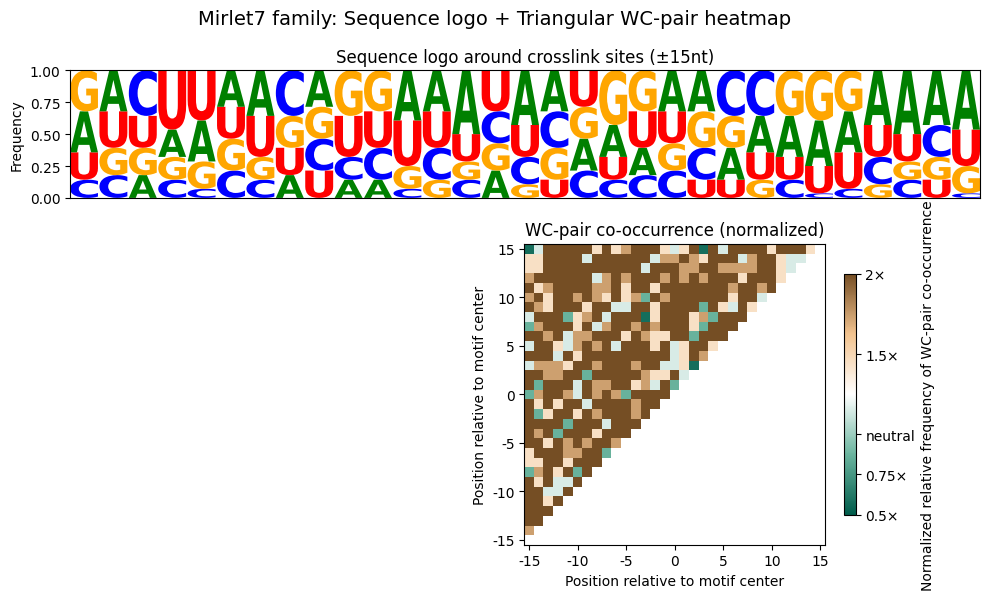

In [68]:
# STEP 5. Sequence Logo 만들기
# ─────────────────────────────────────────────────────────────
N = len(all_windows)
if N == 0:
    raise RuntimeError("윈도우 개수가 0개입니다. entropy_threshold를 낮추거나 BedGraph을 확인하세요.")

counts = {b:[0]*window_length for b in "ACGU"}
for seq in all_windows:
    for i, b in enumerate(seq):
        if b in counts:
            counts[b][i] += 1

freq_df = pd.DataFrame({
    "A": [counts["A"][i]/N for i in range(window_length)],
    "C": [counts["C"][i]/N for i in range(window_length)],
    "G": [counts["G"][i]/N for i in range(window_length)],
    "U": [counts["U"][i]/N for i in range(window_length)],
})
freq_df.index = list(range(-window_radius, window_radius+1))

# ─────────────────────────────────────────────────────────────
# STEP 6. Watson–Crick Pair Co-occurrence 계산
# ─────────────────────────────────────────────────────────────
L = window_length
wc_matrix = np.zeros((L, L), dtype=int)

def is_wc_pair(a, b):
    return (a,b) in {("A","U"),("U","A"),("G","C"),("C","G")}

for seq in all_windows:
    for i in range(L):
        for j in range(i+1, L):
            if is_wc_pair(seq[i], seq[j]):
                wc_matrix[i,j] += 1

freq_matrix = wc_matrix / N
expected    = freq_matrix.mean()
rel_matrix  = freq_matrix / expected
plot_matrix = rel_matrix.T

# ─────────────────────────────────────────────────────────────
# STEP 7. Figure 2E 스타일 시각화: Sequence logo + Triangular heatmap
# ─────────────────────────────────────────────────────────────
plt.figure(figsize=(10, 6))

# (A) Sequence Logo
ax_logo = plt.subplot2grid((3,1), (0,0), rowspan=1)
logo = lm.Logo(freq_df, ax=ax_logo, color_scheme='classic')
ax_logo.set_ylabel("Frequency")
ax_logo.set_xticks([])
ax_logo.set_ylim(0, 1.0)
ax_logo.set_title("Sequence logo around crosslink sites (±15nt)")

# (B) Triangular Heatmap
ax_heat = plt.subplot2grid((3,1), (1,0), rowspan=2)
mask = np.tril(np.ones_like(plot_matrix, dtype=bool), k=-1)

from matplotlib.colors import LinearSegmentedColormap
colors = [
    (0.00, "#005C4B"),  # 0.5× 근처: 진한 민트
    (0.25, "#6BB59F"),  # 0.75× 근처: 연한 민트
    (0.50, "#FFFFFF"),  # neutral: 흰색
    (0.75, "#F2C38F"),  # 1.5× 근처: 연한 황토
    (1.00, "#754E24")   # 2× 근처: 진한 황토
]
custom_cmap = LinearSegmentedColormap.from_list("Custom", colors)

vmin, vmax = 0.5, 2.0
plot_matrix_masked = np.ma.masked_where(~mask, plot_matrix)

im = ax_heat.imshow(
    plot_matrix_masked,
    cmap=custom_cmap,
    vmin=vmin, vmax=vmax,
    origin='lower',
    interpolation='none'
)

ticks  = np.arange(0, L, 5)
labels = list(range(-window_radius, window_radius+1, 5))
ax_heat.set_xticks(ticks); ax_heat.set_xticklabels(labels)
ax_heat.set_yticks(ticks); ax_heat.set_yticklabels(labels)

ax_heat.set_xlabel("Position relative to motif center")
ax_heat.set_ylabel("Position relative to motif center")
ax_heat.set_title("WC-pair co-occurrence (normalized)")

cbar = plt.colorbar(im, ax=ax_heat, shrink=0.8, pad=0.02)
cbar.set_label("Normalized relative frequency of WC-pair co-occurrence")
cbar.set_ticks([0.5, 0.75, 1.0, 1.5, 2.0])
cbar.set_ticklabels(["0.5×", "0.75×", "neutral", "1.5×", "2×"])

plt.tight_layout(rect=[0,0,1,0.95])
plt.suptitle("Mirlet7 family: Sequence logo + Triangular WC-pair heatmap",
             fontsize=14, y=0.99)
plt.show()

In [71]:
# STEP A. 라이브러리 로드 및 파일 경로 설정
# ─────────────────────────────────────────────────────────────
import re
from collections import defaultdict
from Bio import SeqIO

# 1) 미션 3에서 생성해 두셨던 CIMS 후보 목록(pileup_mismatches) 파일 경로
#    -> CSV/TSV로 저장해 두셨다면 pandas로 읽어 오면 됩니다. 
import pandas as pd

cims_let7g_path  = "CLIP-let7g-gene.pileup"    # 예시: columns=['chrom','pos','_ref','matches',…]
cims_let7f1_path = "CLIP-let7f-1-gene.pileup"
cims_let7d_path  = "CLIP-let7d-gene.pileup"

# 2) pre‐let‐7 FASTA 파일 경로 (mm39 기반)
fasta_let7g_path  = "let7g_precursor.fa"
fasta_let7f1_path = "let7f-1_precursor.fa"
fasta_let7d_path  = "let7d_precursor.fa"

# 3) 전체 genome FASTA (인덱스 생성 없이 바로 SeqIO.index로 읽어도 됩니다)
genome_fa_path = "mm39.fa"

# 4) motif = "GGAG"
MOTIF = "GGAG"
motif_len = len(MOTIF)   # 4

# 5) ±15nt window 파라미터
window_radius = 15
window_length = 2 * window_radius + 1  # 31

# ─────────────────────────────────────────────────────────────
# STEP B. 미션 3의 CIMS 후보 목록(pileup_mismatches) 로드
# ─────────────────────────────────────────────────────────────
# (만약 .csv 형태가 아니라, 바로 pandas DataFrame이 노트북에 이미 남아 있다면 df_let7g_mismatches = pileup_mismatches[let7g 조건] 식으로 대체하셔도 됩니다.)

df_cims_let7g  = pd.read_csv(cims_let7g_path)   # 최소 ['chrom','pos', ...] 칼럼 필요
df_cims_let7f1 = pd.read_csv(cims_let7f1_path)
df_cims_let7d  = pd.read_csv(cims_let7d_path)

# “pos” 칼럼은 1-based crosslink 위치를 가정합니다.
# 예시 출력 확인
print("▶ let7g CIMS 후보 샘플:\n", df_cims_let7g.head(), "\n")
print("▶ let7f-1 CIMS 후보 샘플:\n", df_cims_let7f1.head(), "\n")
print("▶ let7d CIMS 후보 샘플:\n", df_cims_let7d.head(), "\n")

▶ let7g CIMS 후보 샘플:
    chr9\t106056039\tN\t9\t<<<<<<<<<\tBHEIG?DII
0  chr9\t106056040\tN\t9\t<<<<<<<<<\tBHEIG?DII
1  chr9\t106056041\tN\t9\t<<<<<<<<<\tBHEIG?DII
2  chr9\t106056042\tN\t9\t<<<<<<<<<\tBHEIG?DII
3  chr9\t106056043\tN\t9\t<<<<<<<<<\tBHEIG?DII
4  chr9\t106056044\tN\t9\t<<<<<<<<<\tBHEIG?DII 

▶ let7f-1 CIMS 후보 샘플:
   chr13\t48691305\tN\t109\tccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccc\tB?IBHBIGI>GGHHH:IIHFGGIIIGHHIHIIBIG?IGBFIE>@IIGHEGIGHHIIIHII:HHIDBDFBIEHIGHIEI8IGGHH>II@IIDBBBH3EIH2ADGEEGDFG
0  chr13\t48691306\tN\t109\tttttttttttttttttttttt...                                                                                                                                                                                                   
1  chr13\t48691307\tN\t109\tccccccccccccccccccccc...                                                                                                                            

In [72]:
# STEP C. “각 전구체(precursor) FASTA 내에서 GGAG motif 위치 스캔” 함수 정의
# ─────────────────────────────────────────────────────────────
def find_motif_positions(fasta_path, motif):
    """
    • fasta_path: pre-let-7*.fa 같이 단일 시퀀스만 기록된 FASTA 파일 경로
    • motif: 이전에 정의한 "GGAG"
    • 반환: 딕셔너리 { 'chrom_or_record_id': [ (motif_start_1b, motif_end_1b), ... ] }
        - 여기서 motif_start_1b, motif_end_1b는 “1-based 좌표” (FASTA 헤더에 따라 chrom과 매핑이 필요)
    """
    motif = motif.upper()
    motif_len = len(motif)
    result = defaultdict(list)

    # Biopython으로 FASTA 레코드 읽기 (실제로는 한 개만 있다고 가정)
    for rec in SeqIO.parse(fasta_path, "fasta"):
        seq_str = str(rec.seq).upper()
        seq_len = len(seq_str)

        # “GGAG”가 나타나는 모든 위치(0-based 검색 후 +1 → 1-based)  
        for match in re.finditer(motif, seq_str):
            start0 = match.start()       # 0-based index
            end0   = match.end() - 1     # 0-based 마지막 index
            # 1-based 변환
            start1b = start0 + 1
            end1b   = end0 + 1
            result[rec.id].append((start1b, end1b))

    return result

# 각 전구체 FASTA에서 GGAG motif 위치 찾기
motif_pos_let7g  = find_motif_positions(fasta_let7g_path,  MOTIF)
motif_pos_let7f1 = find_motif_positions(fasta_let7f1_path, MOTIF)
motif_pos_let7d  = find_motif_positions(fasta_let7d_path,  MOTIF)

print("▶ pre-let-7g 내 GGAG 위치(1-based):",  motif_pos_let7g, "\n")
print("▶ pre-let-7f-1 내 GGAG 위치:",          motif_pos_let7f1, "\n")
print("▶ pre-let-7d 내 GGAG 위치:",          motif_pos_let7d, "\n")


▶ pre-let-7g 내 GGAG 위치(1-based): defaultdict(<class 'list'>, {'chr9:106056039-106056126': [(56, 59)]}) 

▶ pre-let-7f-1 내 GGAG 위치: defaultdict(<class 'list'>, {}) 

▶ pre-let-7d 내 GGAG 위치: defaultdict(<class 'list'>, {}) 



In [81]:
import pandas as pd

# 예: let-7g CIMS(=mismatch) 후보 파일 읽기
df_cims_let7g = pd.read_csv(
    "CLIP-let7g-gene.pileup",
    sep="\t",                     # 탭으로 분리
    header=None,                  # 파일에 헤더 행이 없다고 가정
    names=["chrom","pos","_ref","count","basereads","quals"]
)

# 열이 제대로 분리되었는지 확인
print("▶ df_cims_let7g 칼럼 목록:", df_cims_let7g.columns.tolist())
print(df_cims_let7g.head())

df_cims_let7f1 = pd.read_csv(
    "CLIP-let7f-1-gene.pileup",
    sep="\t",
    header=None,
    names=["chrom","pos","_ref","count","basereads","quals"]
)
df_cims_let7d = pd.read_csv(
    "CLIP-let7d-gene.pileup",
    sep="\t",
    header=None,
    names=["chrom","pos","_ref","count","basereads","quals"]
)

▶ df_cims_let7g 칼럼 목록: ['chrom', 'pos', '_ref', 'count', 'basereads', 'quals']
  chrom        pos _ref  count  basereads      quals
0  chr9  106056039    N      9  <<<<<<<<<  BHEIG?DII
1  chr9  106056040    N      9  <<<<<<<<<  BHEIG?DII
2  chr9  106056041    N      9  <<<<<<<<<  BHEIG?DII
3  chr9  106056042    N      9  <<<<<<<<<  BHEIG?DII
4  chr9  106056043    N      9  <<<<<<<<<  BHEIG?DII


In [86]:
import pandas as pd
import re
from Bio import SeqIO

# =========================
# [STEP 1] CIMS DataFrame 준비
# =========================
# (1) pileup에서 직접 mismatch만 뽑아오기 예시
pileup_let7g = pd.read_csv(
    "CLIP-let7g-gene.pileup",
    sep="\t", header=None,
    names=["chrom","pos","_ref","count","basereads","quals"]
)
pattern = re.compile(r"[A-Za-z]")
df_cims_let7g = pileup_let7g[ pileup_let7g["basereads"].apply(lambda x: bool(pattern.search(x))) ].copy()

pileup_let7f1 = pd.read_csv(
    "CLIP-let7f-1-gene.pileup",
    sep="\t", header=None,
    names=["chrom","pos","_ref","count","basereads","quals"]
)
df_cims_let7f1 = pileup_let7f1[ pileup_let7f1["basereads"].apply(lambda x: bool(pattern.search(x))) ].copy()

pileup_let7d = pd.read_csv(
    "CLIP-let7d-gene.pileup",
    sep="\t", header=None,
    names=["chrom","pos","_ref","count","basereads","quals"]
)
df_cims_let7d = pileup_let7d[ pileup_let7d["basereads"].apply(lambda x: bool(pattern.search(x))) ].copy()

print("▶ let7g CIMS columns:", df_cims_let7g.columns.tolist())
print("▶ let7f-1 CIMS columns:", df_cims_let7f1.columns.tolist())
print("▶ let7d CIMS columns:", df_cims_let7d.columns.tolist())

▶ let7g CIMS columns: ['chrom', 'pos', '_ref', 'count', 'basereads', 'quals']
▶ let7f-1 CIMS columns: ['chrom', 'pos', '_ref', 'count', 'basereads', 'quals']
▶ let7d CIMS columns: ['chrom', 'pos', '_ref', 'count', 'basereads', 'quals']


In [87]:
# [STEP 2] motif 중심 좌표 계산
# =========================
# pre-let-7g: FASTA 1-based 시작 = 106056039, motif “GGAG” 위치 = 56-59 → 중심 G = 57(FASTA)
fa_start_let7g = 106056039  
chrom_let7g   = "chr9"
pos_center_fasta_let7g = 57
pos_center_genome_let7g = fa_start_let7g + (pos_center_fasta_let7g - 1)  # → 106056095

# pre-let-7f-1: FASTA 1-based 시작 = 48691295, motif “GGAA” 위치 = 8-11 → 중심 G = 9(FASTA)
fa_start_let7f1 = 48691295
chrom_let7f1    = "chr13"
pos_center_fasta_let7f1 = 9
pos_center_genome_let7f1 = fa_start_let7f1 + (pos_center_fasta_let7f1 - 1)  # → 48691303

# pre-let-7d: FASTA 1-based 시작 = 48689478, motif “AAGG” 위치 = 11-14 → 중심 G = 13(FASTA)
fa_start_let7d  = 48689478
chrom_let7d     = "chr13"
pos_center_fasta_let7d = 13
pos_center_genome_let7d = fa_start_let7d + (pos_center_fasta_let7d - 1)  # → 48689490

# =========================
# [STEP 3] CIMS 목록에서 실제 crosslink된 G 좌표 선택
# =========================
# ※ df_cims_*['pos']는 정상적으로 읽힌 상태여야 합니다.

# (A) let-7g
if pos_center_genome_let7g in df_cims_let7g['pos'].values:
    chosen_let7g = [pos_center_genome_let7g]
else:
    # motif 4mer “GGAG”의 세 번째 G(=FASTA 58)도 검사
    alt_let7g = fa_start_let7g + (58 - 1)
    chosen_let7g = [alt_let7g] if alt_let7g in df_cims_let7g['pos'].values else [pos_center_genome_let7g]

# (B) let-7f-1
if pos_center_genome_let7f1 in df_cims_let7f1['pos'].values:
    chosen_let7f1 = [pos_center_genome_let7f1]
else:
    alt_let7f1 = fa_start_let7f1 + (10 - 1)
    chosen_let7f1 = [alt_let7f1] if alt_let7f1 in df_cims_let7f1['pos'].values else [pos_center_genome_let7f1]

# (C) let-7d
if pos_center_genome_let7d in df_cims_let7d['pos'].values:
    chosen_let7d = [pos_center_genome_let7d]
else:
    alt_let7d = fa_start_let7d + (12 - 1)
    chosen_let7d = [alt_let7d] if alt_let7d in df_cims_let7d['pos'].values else [pos_center_genome_let7d]

print("▶ 최종 crosslink center (let-7g):", chosen_let7g)
print("▶ 최종 crosslink center (let-7f-1):", chosen_let7f1)
print("▶ 최종 crosslink center (let-7d):", chosen_let7d)


▶ 최종 crosslink center (let-7g): [106056095]
▶ 최종 crosslink center (let-7f-1): [48691303]
▶ 최종 crosslink center (let-7d): [48689490]


In [88]:
# [STEP 4] ±15nt 윈도우 추출
# =========================
genome_idx = SeqIO.index("mm39.fa", "fasta")
def extract_windows_from_genome(genome_index, chrom, center_list, window_radius=15):
    windows = []
    L = window_radius
    for pos0 in center_list:
        w0, w1 = pos0 - L, pos0 + L
        if w0 < 1 or w1 > len(genome_index[chrom].seq):
            continue
        dna_seq = genome_index[chrom].seq[w0-1:w1]
        rna_seq = str(dna_seq).upper().replace("T","U")
        if len(rna_seq) == 2 * L + 1:
            windows.append(rna_seq)
    return windows

wins_let7g  = extract_windows_from_genome(genome_idx, chrom_let7g,  chosen_let7g,  15)
wins_let7f1 = extract_windows_from_genome(genome_idx, chrom_let7f1, chosen_let7f1, 15)
wins_let7d  = extract_windows_from_genome(genome_idx, chrom_let7d,  chosen_let7d,  15)

print("▶ let-7g windows:", wins_let7g)
print("▶ let-7f-1 windows:", wins_let7f1)
print("▶ let-7d windows:", wins_let7d)

▶ let-7g windows: ['UACCACCCGGUACAGGAGAUAACUGUACAGG']
▶ let-7f-1 windows: ['AUGCAGCAAGUCUACUCCUCAGGGAAGGCAA']
▶ let-7d windows: ['CGUAUGCUGGUAUAAUAAGGCCCUAAGAAAG']


In [89]:
# [STEP 5] 최종 윈도우 FASTA로 저장
# =========================
all_motif_windows = wins_let7g + wins_let7f1 + wins_let7d
with open("all_Mirlet7_motif_centered_windows.fa", "w") as fw:
    for i, seq in enumerate(all_motif_windows):
        fw.write(f">window_{i}\n{seq}\n")

print("▶ 총", len(all_motif_windows), "개의 윈도우를 all_Mirlet7_motif_centered_windows.fa에 저장했습니다.")

▶ 총 3 개의 윈도우를 all_Mirlet7_motif_centered_windows.fa에 저장했습니다.


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logomaker as lm

# 1) 윈도우 리스트 직접 입력 (앞서 추출된 3개 서열)
all_windows = [
    "UACCACCCGGUACAGGAGAUAACUGUACAGG",
    "AUGCAGCAAGUCUACUCCUCAGGGAAGGCAA",
    "CGUAUGCUGGUAUAAUAAGGCCCUAAGAAAG"
]

# 2) 자리별 염기(A/C/G/U) 개수 세기
window_length = len(all_windows[0])  # 31
N = len(all_windows)                # 3

# 초기화: A/C/G/U 빈도 테이블
counts = {b: [0]*window_length for b in "ACGU"}

for seq in all_windows:
    for i, base in enumerate(seq):
        if base in counts:
            counts[base][i] += 1

# 상대 빈도 DataFrame 생성 (자리 i별 염기 비율 = count / N)
freq_df = pd.DataFrame({
    "A": [counts["A"][i]/N for i in range(window_length)],
    "C": [counts["C"][i]/N for i in range(window_length)],
    "G": [counts["G"][i]/N for i in range(window_length)],
    "U": [counts["U"][i]/N for i in range(window_length)]
})
# 인덱스를 –15…+15 로 설정
freq_df.index = list(range(-15, 16))

print("자리별 염기 상대 빈도 (예시 상위 5행):")
print(freq_df.head())

자리별 염기 상대 빈도 (예시 상위 5행):
            A         C         G         U
-15  0.333333  0.333333  0.000000  0.333333
-14  0.333333  0.000000  0.333333  0.333333
-13  0.000000  0.333333  0.333333  0.333333
-12  0.333333  0.666667  0.000000  0.000000
-11  0.666667  0.000000  0.000000  0.333333


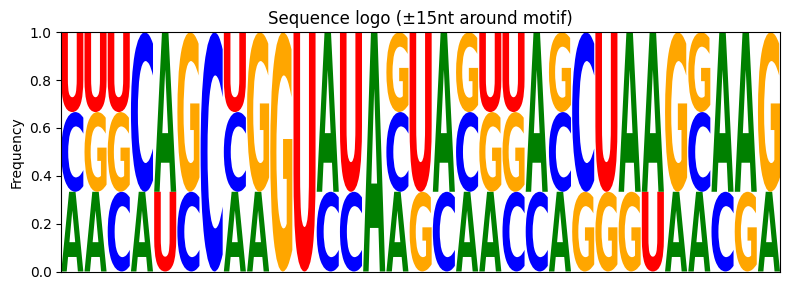

In [91]:
plt.figure(figsize=(8, 3))
ax_logo = plt.subplot(1, 1, 1)
logo = lm.Logo(freq_df, ax=ax_logo, color_scheme='classic')
ax_logo.set_ylabel("Frequency")
ax_logo.set_xticks([])
ax_logo.set_ylim(0, 1.0)
ax_logo.set_title("Sequence logo (±15nt around motif)")
plt.tight_layout()
plt.show()

In [92]:
# 1) Watson–Crick 쌍을 판단하는 함수
def is_wc_pair(a, b):
    return (a, b) in {("A", "U"), ("U", "A"), ("G", "C"), ("C", "G")}

L = window_length  # 31
wc_matrix = np.zeros((L, L), dtype=int)

for seq in all_windows:
    for i in range(L):
        for j in range(i+1, L):
            if is_wc_pair(seq[i], seq[j]):
                wc_matrix[i, j] += 1

# 2) 상대 빈도 (정규화)
freq_matrix = wc_matrix / N
expected = freq_matrix.mean()      # 전체 평균값
rel_matrix = freq_matrix / expected
plot_matrix = rel_matrix.T         # 시각화를 위해 전치

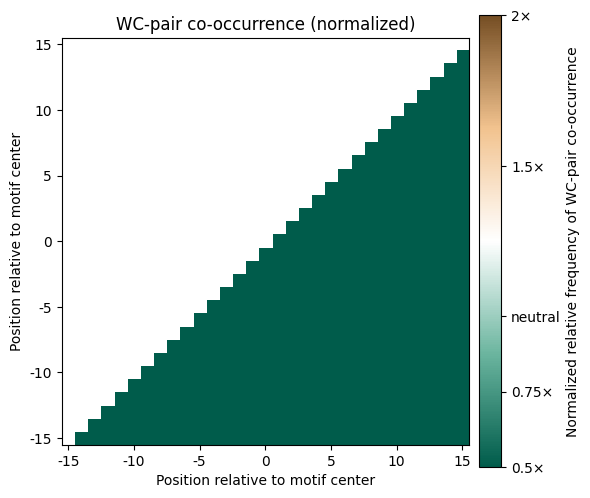

In [93]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(6, 6))
ax_heat = plt.subplot(1, 1, 1)

# 대칭 행렬 상에서 i<j 부분(upper triangle)만 마스크 처리
mask = np.tril(np.ones_like(plot_matrix, dtype=bool), k=0)

# 커스텀 컬러맵: 민트→흰색→황토, 논문 Fig 2E 스타일
colors = [
    (0.00, "#005C4B"),  # 0.5× (진한 민트)
    (0.25, "#6BB59F"),  # 0.75× (연한 민트)
    (0.50, "#FFFFFF"),  # neutral (흰색)
    (0.75, "#F2C38F"),  # 1.5× (연한 황토)
    (1.00, "#754E24")   # 2× (진한 황토)
]
custom_cmap = LinearSegmentedColormap.from_list("Custom", colors)

vmin, vmax = 0.5, 2.0
masked_matrix = np.ma.masked_where(mask, plot_matrix)

im = ax_heat.imshow(
    masked_matrix,
    cmap=custom_cmap, vmin=vmin, vmax=vmax,
    origin='lower', interpolation='none'
)

# 눈금: −15…+15 범위, 5 단위마다 tick 설정
ticks = np.arange(0, L, 5)
labels = list(range(-15, 16, 5))
ax_heat.set_xticks(ticks); ax_heat.set_xticklabels(labels)
ax_heat.set_yticks(ticks); ax_heat.set_yticklabels(labels)

ax_heat.set_xlabel("Position relative to motif center")
ax_heat.set_ylabel("Position relative to motif center")
ax_heat.set_title("WC-pair co-occurrence (normalized)")

cbar = plt.colorbar(im, ax=ax_heat, shrink=0.8, pad=0.02)
cbar.set_label("Normalized relative frequency of WC-pair co-occurrence")
cbar.set_ticks([0.5, 0.75, 1.0, 1.5, 2.0])
cbar.set_ticklabels(["0.5×", "0.75×", "neutral", "1.5×", "2×"])

plt.tight_layout()
plt.show()